In [1]:
# Install & Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("solar_energy_analysis.csv")

Saving solar_energy_analysis.csv to solar_energy_analysis.csv


In [4]:
# Preview
print("Preview Data:")
print(df.head(), "\n")

Preview Data:
      Tanggal  Irradiance_kWh_m2  Temperature_C  Humidity_%  Solar_Output_MWh
0  2025-01-01               5.50           28.2        65.2            115.48
1  2025-01-02               4.86           35.6         NaN            100.60
2  2025-01-03               5.65           30.0        58.9            122.47
3  2025-01-04               6.52           26.8        58.0            142.08
4  2025-01-05               4.77           32.5        78.1             93.48 



In [5]:
#Statistik Deskriptif
stats = pd.DataFrame({
    "Mean": df[["Irradiance_kWh_m2", "Temperature_C", "Humidity_%", "Solar_Output_MWh"]].mean(),
    "Median": df[["Irradiance_kWh_m2", "Temperature_C", "Humidity_%", "Solar_Output_MWh"]].median(),
    "Std Dev": df[["Irradiance_kWh_m2", "Temperature_C", "Humidity_%", "Solar_Output_MWh"]].std()
})
print("=== Statistik Deskriptif ===")
print(stats, "\n")

=== Statistik Deskriptif ===
                         Mean  Median    Std Dev
Irradiance_kWh_m2    5.279259    4.86   2.134635
Temperature_C       28.696296   29.10   4.665955
Humidity_%          71.811111   70.90  14.085981
Solar_Output_MWh   113.812593   95.77  79.354831 



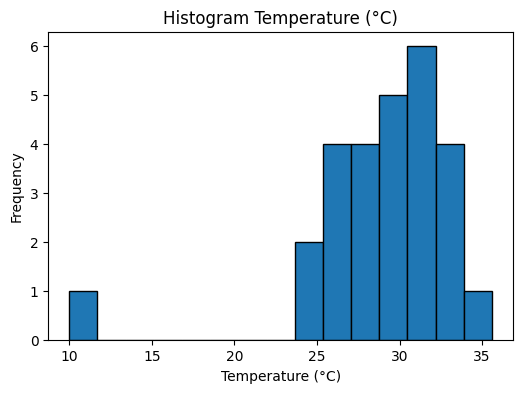

In [6]:
# Histogram contoh: Temperature
plt.figure(figsize=(6,4))
plt.hist(df["Temperature_C"].dropna(), bins=15, edgecolor="black")
plt.title("Histogram Temperature (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

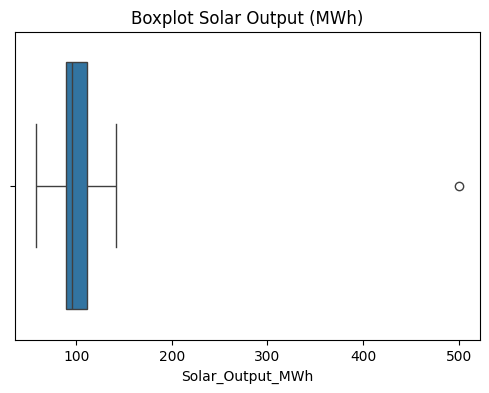

In [7]:
# Boxplot Solar Output
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Solar_Output_MWh"])
plt.title("Boxplot Solar Output (MWh)")
plt.show()

In [8]:
# Cek missing values
print("=== Missing Values ===")
print(df.isnull().sum(), "\n")

=== Missing Values ===
Tanggal              0
Irradiance_kWh_m2    3
Temperature_C        3
Humidity_%           3
Solar_Output_MWh     3
dtype: int64 



In [9]:
# Strategi 1: Hapus baris dengan missing value
df_dropna = df.dropna()

In [10]:
# Strategi 2: Isi dengan mean
df_fill = df.fillna(df.mean(numeric_only=True))

print("Jumlah baris asli:", len(df))
print("Setelah drop NA:", len(df_dropna))
print("Setelah isi mean:", len(df_fill), "\n")

Jumlah baris asli: 30
Setelah drop NA: 20
Setelah isi mean: 30 



In [11]:
# Deteksi outlier dengan IQR (contoh Solar Output)
Q1 = df["Solar_Output_MWh"].quantile(0.25)
Q3 = df["Solar_Output_MWh"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Solar_Output_MWh"] < Q1 - 1.5*IQR) | (df["Solar_Output_MWh"] > Q3 + 1.5*IQR)]
print("=== Jumlah Outlier Solar Output ===", len(outliers), "\n")

=== Jumlah Outlier Solar Output === 1 



=== Correlation Matrix ===
                   Irradiance_kWh_m2  Temperature_C  Humidity_%  \
Irradiance_kWh_m2           1.000000      -0.037314    0.050627   
Temperature_C              -0.037314       1.000000    0.010480   
Humidity_%                  0.050627       0.010480    1.000000   
Solar_Output_MWh            0.554691       0.142132   -0.112064   

                   Solar_Output_MWh  
Irradiance_kWh_m2          0.554691  
Temperature_C              0.142132  
Humidity_%                -0.112064  
Solar_Output_MWh           1.000000   



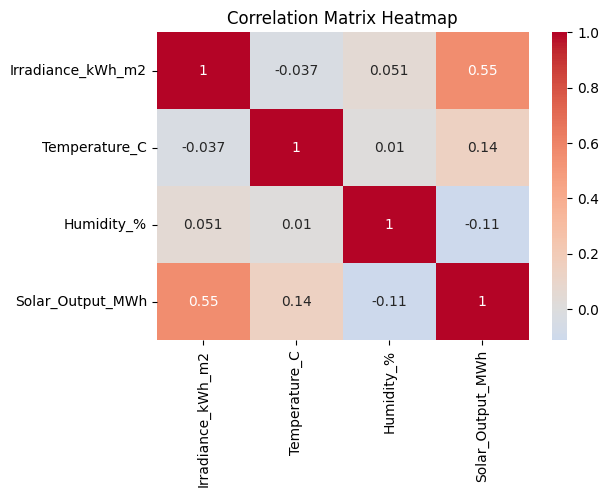

In [12]:
#Hubungan Antar Variabel
corr = df[["Irradiance_kWh_m2", "Temperature_C", "Humidity_%", "Solar_Output_MWh"]].corr()

print("=== Correlation Matrix ===")
print(corr, "\n")

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [13]:
# Interpretasi sederhana
max_corr = corr["Solar_Output_MWh"].drop("Solar_Output_MWh").abs().idxmax()
print(f"Variabel yang paling kuat hubungannya dengan Solar Output adalah: {max_corr}")

Variabel yang paling kuat hubungannya dengan Solar Output adalah: Irradiance_kWh_m2
